In [3]:
import numpy as np
import xarray as xr
import glob
from functools import partial
from matplotlib import pyplot as plt

# Lisa's tools
import sys 
path_tools = '/home1/datahome/ljessel/Scripts/'   # path to the toolkit directory
sys.path.append(path_tools)
from map_SAR_variables_toolkit.sar_tools.sar import preprocess_sar, map_sar

# 0) Loading file

In [4]:
path = '/home/datawork-cersat-public/cache/project/sarwave/data/products/tests/iw/slc/l1b/3.7/'
#safe = 'S1B_IW_XSP__1SDV_20210821T122505_20210821T122535_028344_0361CA_E53C.SAFE'
safe = 'S1B_IW_XSP__1SDV_20210823T181301*.SAFE'
fns = glob.glob(path+safe+'/*vv*.nc')

print(fns)

['/home/datawork-cersat-public/cache/project/sarwave/data/products/tests/iw/slc/l1b/3.7/S1B_IW_XSP__1SDV_20210823T181301_20210823T181328_028377_0362CD_1745.SAFE/s1b-iw1-slc-vv-20210823t181301-20210823t181327-028377-0362cd-004_L1B_xspec_IFR_3.7.nc', '/home/datawork-cersat-public/cache/project/sarwave/data/products/tests/iw/slc/l1b/3.7/S1B_IW_XSP__1SDV_20210823T181301_20210823T181328_028377_0362CD_1745.SAFE/s1b-iw3-slc-vv-20210823t181301-20210823t181326-028377-0362cd-006_L1B_xspec_IFR_3.7.nc', '/home/datawork-cersat-public/cache/project/sarwave/data/products/tests/iw/slc/l1b/3.7/S1B_IW_XSP__1SDV_20210823T181301_20210823T181328_028377_0362CD_1745.SAFE/s1b-iw2-slc-vv-20210823t181302-20210823t181328-028377-0362cd-005_L1B_xspec_IFR_3.7.nc']


# 1) With the intra grp 

## 1.1) Selection & preprocess of the dataset grp 

In [5]:
# if varn is'nt specified, it select all the disponible variables seteled in the preprocess function  
partial_func = partial(preprocess_sar)  # preprocessing of the "raw" netcdf

#ds_intra = xr.open_mfdataset(fns,preprocess = partial_func,combine='nested',concat_dim='swath', group='intraburst')  #conflicting values for variable 'line' on objects to be combined. You can skip this check by specifying compat='override'
ds_intra = xr.open_mfdataset(fns,preprocess = partial_func,combine='nested',compat='override', concat_dim='swath', group='intraburst',coords='minimal')
ds_intra['s0_filt_db'] = 10*np.log10(ds_intra['sigma0_filt'])          # sigma0 filtered in dB

In [6]:
display(ds_intra) 

<xarray.Dataset> Size: 9kB
Dimensions:                   (burst: 9, lambda_range_max_macs: 1,
                               tile_line: 1, tile_sample: 5, fprt: 10,
                               swath: 3, 2tau: 1, c_sample: 2, c_line: 2)
Coordinates:
  * burst                     (burst) int16 18B 0 1 2 3 4 5 6 7 8
  * lambda_range_max_macs     (lambda_range_max_macs) float32 4B 50.0
  * tile_line                 (tile_line) int64 8B 0
  * tile_sample               (tile_sample) int64 40B 0 1 2 3 4
  * fprt                      (fprt) int64 80B 0 1 2 3 4 5 6 7 8 9
    pol                       <U2 8B ...
    line                      (burst, tile_line) int16 18B dask.array<chunksize=(9, 1), meta=np.ndarray>
    sample                    (burst, tile_sample) float32 180B dask.array<chunksize=(9, 5), meta=np.ndarray>
    longitude                 (burst, tile_line, tile_sample) float32 180B dask.array<chunksize=(9, 1, 5), meta=np.ndarray>
    latitude                  (burst, tile_line, tile_sample) float32 180B dask.array<chunksize=(9, 1, 5), meta=np.ndarray>
Dimensions without coordinates: swath, 2tau, c_sample, c_line
Data variables:
    sigma0_filt               (swath, burst, tile_line, tile_sample) float32 540B dask.array<chunksize=(1, 9, 1, 5), meta=np.ndarray>
    normalized_variance_filt  (swath, burst, tile_line, tile_sample) float32 540B dask.array<chunksize=(1, 9, 1, 5), meta=np.ndarray>
    macs_Re                   (swath, burst, tile_line, tile_sample, lambda_range_max_macs, 2tau) float32 540B dask.array<chunksize=(1, 9, 1, 5, 1, 1), meta=np.ndarray>
    macs_Im                   (swath, burst, tile_line, tile_sample, lambda_range_max_macs, 2tau) float32 540B dask.array<chunksize=(1, 9, 1, 5, 1, 1), meta=np.ndarray>
    corner_latitude           (swath, burst, tile_line, tile_sample, c_sample, c_line) float32 2kB dask.array<chunksize=(1, 9, 1, 5, 2, 2), meta=np.ndarray>
    corner_longitude          (swath, burst, tile_line, tile_sample, c_sample, c_line) float32 2kB dask.array<chunksize=(1, 9, 1, 5, 2, 2), meta=np.ndarray>
    land_flag                 (swath, burst, tile_line, tile_sample) float64 1kB dask.array<chunksize=(1, 9, 1, 5), meta=np.ndarray>
    footprt                   (swath, fprt) float64 240B -7.253 47.83 ... 48.03
    start                     (swath) datetime64[ns] 24B 2021-08-23T18:13:01 ...
    stop                      (swath) datetime64[ns] 24B 2021-08-23T18:13:27 ...
    s0_filt_db                (swath, burst, tile_line, tile_sample) float32 540B dask.array<chunksize=(1, 9, 1, 5), meta=np.ndarray>
Attributes: (12/24)
    name:                   SENTINEL1_DS:/home/datawork-cersat-public/project...
    short_name:             SENTINEL1_DS:S1B_IW_SLC__1SDV_20210823T181301_202...
    product:                SLC
    safe:                   S1B_IW_SLC__1SDV_20210823T181301_20210823T181328_...
    swath:                  IW
    multidataset:           False
    ...                     ...
    radar_frequency:        5405000454.33435
    azimuth_time_interval:  0.002055556299999998
    tile_width_sample:      17500
    tile_width_line:        17500
    tile_overlap_sample:    0
    tile_overlap_line:      0

<div class="alert alert-block alert-info">
<b>Tip:</b> if the wanted variable as a dimension other than positional dimensions (burst,tile_line,tile_sample), e.g., (burst,tile_line,tile_sample,<b>2tau</b>), you can specify the value of the new dimension to be selected. For instance, 
    
```python
varn = ['macs_Im']
dims_sel = {'lambda_range_max_macs':50,'2tau':0}
partial_func = partial(preprocess_sar, varn=varn,dims_sel = dims_sel)
ds = xr.open_mfdataset(fn,combine    = 'nested',concat_dim = 'swath',preprocess = partial_func,group='intraburst').load()
```

</div>

## 1.2) Plotting SAR 

<div class="alert alert-block alert-warning">
<b>Important note:</b> to be able to plot SAR geometries, the netCDFs should contain corner_latitude and corner_longitude variables
</div>

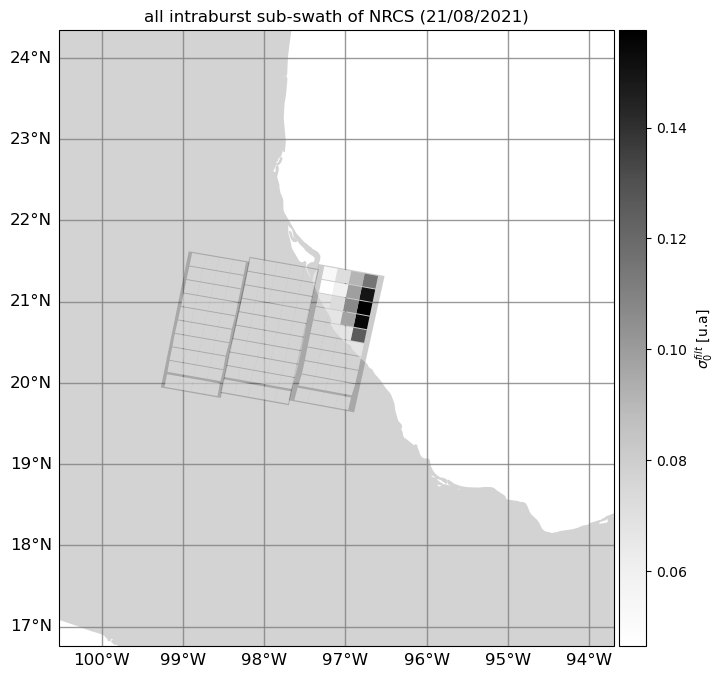

In [33]:
map_sar(ds_intra,'sigma0_filt',
        cmap = plt.cm.Greys, 
        land_mask=ds_intra.land_flag, 
        title='all intraburst sub-swath of NRCS (21/08/2021)', 
        clbl=r'$\sigma_0^{filt}$ [u.a]')

#plt.savefig('/home1/datahome/ljessel/Plots/NRCS_data_discover/nrcs_iwallsubswath_intra_23082021T1813.png')

# 2) With the interburst grp 

## 2.1) Selection & preprocess of the dataset grp 

In [7]:
ds_inter = xr.open_mfdataset(fns,preprocess = partial_func, combine='nested', concat_dim='swath', group='interburst', compat='override', coords='minimal')
ds_inter['s0_filt_db'] = 10*np.log10(ds_inter['sigma0_filt'])          # sigma0 filtered in dB

In [8]:
display(ds_inter) 

<xarray.Dataset> Size: 8kB
Dimensions:                   (burst: 8, lambda_range_max_macs: 1,
                               tile_line: 1, tile_sample: 5, fprt: 10,
                               swath: 3, c_sample: 2, c_line: 2)
Coordinates:
  * burst                     (burst) int16 16B 0 1 2 3 4 5 6 7
  * lambda_range_max_macs     (lambda_range_max_macs) float32 4B 50.0
  * tile_line                 (tile_line) int64 8B 0
  * tile_sample               (tile_sample) int64 40B 0 1 2 3 4
  * fprt                      (fprt) int64 80B 0 1 2 3 4 5 6 7 8 9
    pol                       <U2 8B ...
    line                      (burst, tile_line) int16 16B dask.array<chunksize=(8, 1), meta=np.ndarray>
    sample                    (burst, tile_sample) float32 160B dask.array<chunksize=(8, 5), meta=np.ndarray>
    longitude                 (burst, tile_line, tile_sample) float32 160B dask.array<chunksize=(8, 1, 5), meta=np.ndarray>
    latitude                  (burst, tile_line, tile_sample) float32 160B dask.array<chunksize=(8, 1, 5), meta=np.ndarray>
Dimensions without coordinates: swath, c_sample, c_line
Data variables:
    sigma0_filt               (swath, burst, tile_line, tile_sample) float32 480B dask.array<chunksize=(1, 8, 1, 5), meta=np.ndarray>
    normalized_variance_filt  (swath, burst, tile_line, tile_sample) float32 480B dask.array<chunksize=(1, 8, 1, 5), meta=np.ndarray>
    macs_Re                   (swath, burst, tile_line, tile_sample, lambda_range_max_macs) float32 480B dask.array<chunksize=(1, 8, 1, 5, 1), meta=np.ndarray>
    macs_Im                   (swath, burst, tile_line, tile_sample, lambda_range_max_macs) float32 480B dask.array<chunksize=(1, 8, 1, 5, 1), meta=np.ndarray>
    corner_latitude           (swath, burst, tile_line, tile_sample, c_sample, c_line) float32 2kB dask.array<chunksize=(1, 8, 1, 5, 2, 2), meta=np.ndarray>
    corner_longitude          (swath, burst, tile_line, tile_sample, c_sample, c_line) float32 2kB dask.array<chunksize=(1, 8, 1, 5, 2, 2), meta=np.ndarray>
    land_flag                 (swath, burst, tile_line, tile_sample) float64 960B dask.array<chunksize=(1, 8, 1, 5), meta=np.ndarray>
    footprt                   (swath, fprt) float64 240B -7.253 47.83 ... 48.03
    start                     (swath) datetime64[ns] 24B 2021-08-23T18:13:01 ...
    stop                      (swath) datetime64[ns] 24B 2021-08-23T18:13:27 ...
    s0_filt_db                (swath, burst, tile_line, tile_sample) float32 480B dask.array<chunksize=(1, 8, 1, 5), meta=np.ndarray>
Attributes: (12/22)
    name:                   SENTINEL1_DS:/home/datawork-cersat-public/project...
    short_name:             SENTINEL1_DS:S1B_IW_SLC__1SDV_20210823T181301_202...
    product:                SLC
    safe:                   S1B_IW_SLC__1SDV_20210823T181301_20210823T181328_...
    swath:                  IW
    multidataset:           False
    ...                     ...
    mean_incidence:         33.62754182022275
    azimuth_time_interval:  0.002055556299999998
    tile_width_sample:      17500
    tile_width_line:        17500
    tile_overlap_sample:    0
    tile_overlap_line:      0

<div class="alert alert-block alert-info">
<b>Tip:</b> if the wanted variable as a dimension other than positional dimensions (burst,tile_line,tile_sample), e.g., (burst,tile_line,tile_sample,<b>2tau</b>), you can specify the value of the new dimension to be selected. For instance, 
    
```python
varn = ['macs_Im']
dims_sel = {'lambda_range_max_macs':50,'2tau':0}
partial_func = partial(preprocess_sar, varn=varn,dims_sel = dims_sel)
ds = xr.open_mfdataset(fn,combine    = 'nested',concat_dim = 'swath',preprocess = partial_func,group='intraburst').load()
```

</div>

## 2.2) Plotting SAR 

<div class="alert alert-block alert-warning">
<b>Important note:</b> to be able to plot SAR geometries, the netCDFs should contain corner_latitude and corner_longitude variables
</div>

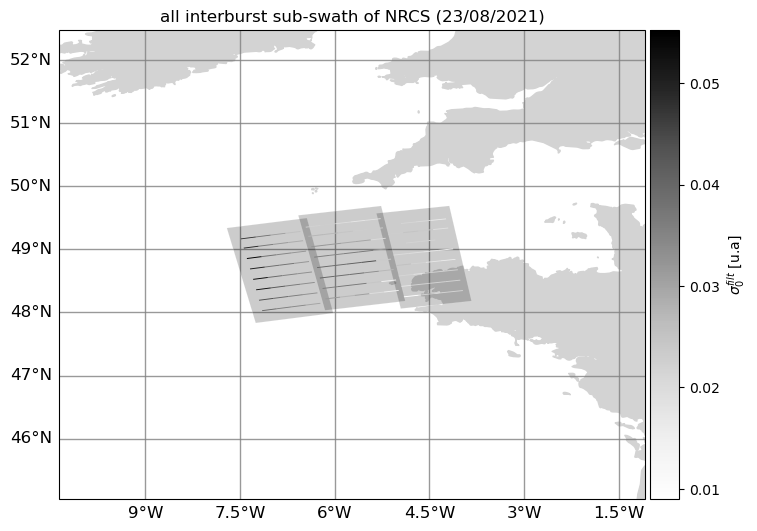

In [8]:
map_sar(ds_inter,'sigma0_filt',
        cmap = plt.cm.Greys, 
        land_mask=ds_inter.land_flag, 
        title='all interburst sub-swath of NRCS (23/08/2021)',
        clbl=r'$\sigma_0^{filt}$ [u.a]')

plt.savefig('/home1/datahome/ljessel/Plots/NRCS_data_discover/nrcs_iwallsubswath_inter_230821T1813')

# 3) Plotting together

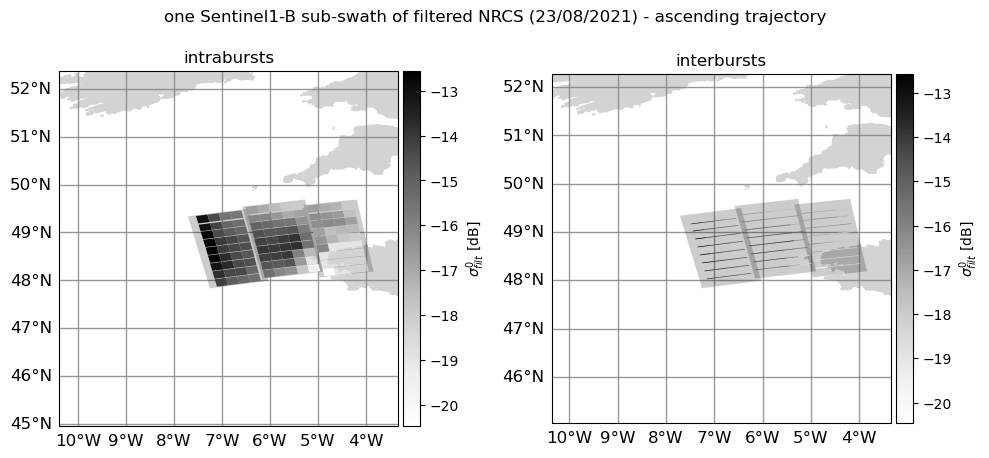

In [16]:
import cartopy.crs as ccrs
proj=ccrs.PlateCarree()

fig = plt.figure(figsize=(10,5))

map_sar(ds_intra,'s0_filt_db',
        ax=fig.add_subplot(1,2,1, projection=proj),
        cmap = plt.cm.Greys,
        land_mask=ds_intra.land_flag,
        title='intrabursts',
        clbl=r'$\sigma^0_{filt}$ [dB]')

map_sar(ds_inter,'s0_filt_db',
        ax=fig.add_subplot(1,2,2, projection=proj),
        cmap = plt.cm.Greys,
        land_mask=ds_inter.land_flag,
        title='interbursts',
        clbl=r'$\sigma^0_{filt}$ [dB]')


plt.tight_layout()
plt.suptitle('one Sentinel1-B sub-swath of filtered NRCS (23/08/2021) - ascending trajectory')
plt.draw()

plt.savefig('/home1/datahome/ljessel/Plots/NRCS_data_discover/nrcs_s1b_allsubswath_intra&inter_230821T1813.png')